# Run GODEC on example video
Here, we run both GODEC algorithms on a video provided with the GreBsmo code ([download link](https://sites.google.com/site/godecomposition/GreBsmo.zip?attredirects=0&d=1)), available from [this site](https://sites.google.com/site/godecomposition/).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.io as sio
import godec

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
def make_figure(M, width, height, L, S, LS, noise):
    frame = 0
    # Reshape
    M_frame = M[:, frame].reshape(width, height).T
    L_frame = L[:, frame].reshape(width, height).T
    S_frame = S[:, frame].reshape(width, height).T
    LS_frame = LS[:, frame].reshape(width, height).T
    noise_frame = noise[:, frame].reshape(width, height).T
    # Play
    fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
    axes[0, 0].set_title('X(Sample)', fontsize=30)
    axes[0, 1].set_title('L(Low-rank)', fontsize=30)
    axes[1, 1].set_title('S(Sparse)', fontsize=30)
    axes[1, 0].set_title('G(Noise)', fontsize=30)
    im1 = axes[0, 0].imshow(M_frame, cmap='gray')
    im2 = axes[0, 1].imshow(L_frame, cmap='gray')
    im3 = axes[1, 0].imshow(noise_frame, cmap='gray')
    im4 = axes[1, 1].imshow(S_frame, cmap='gray')
    axes[0, 0].xaxis.set_visible(False)
    axes[0, 1].xaxis.set_visible(False)
    axes[1, 0].xaxis.set_visible(False)
    axes[1, 1].xaxis.set_visible(False)
    axes[0, 0].yaxis.set_visible(False)
    axes[0, 1].yaxis.set_visible(False)
    axes[1, 0].yaxis.set_visible(False)
    axes[1, 1].yaxis.set_visible(False)
    fig.tight_layout()
    return fig, axes

In [3]:
input_file = "/Users/taylor/Downloads/demo.mat"
input_file = "/Users/taylor/Downloads/GreBsmo/bootstrap1-200.mat"
mat = sio.loadmat(input_file)
data = mat["XO"].astype(float)
m, n = 160, 120

<ipython-input-4-e73f2f9f866c>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


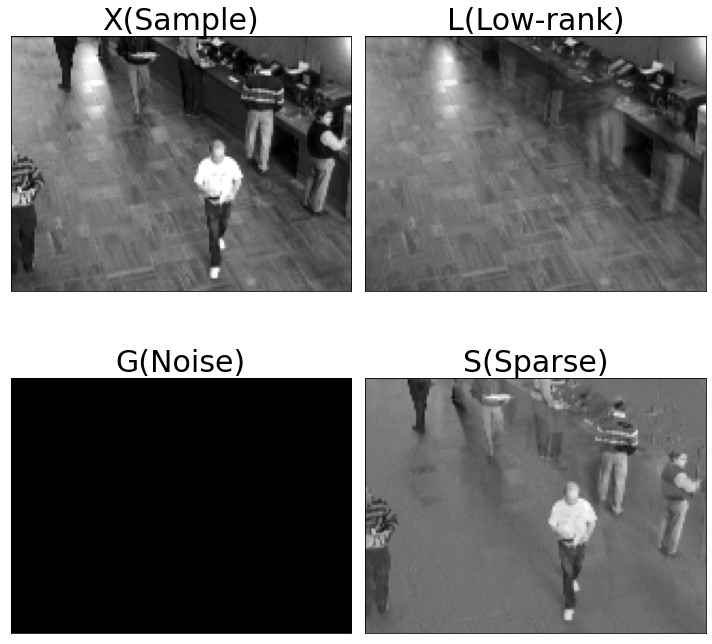

In [4]:
lowrank, sparse, reconstruction, noise, rmse = godec.standard_godec(
    data,
    rank=3,
    iterated_power=5,
    quiet=True,
)
fig, axes = make_figure(data, m, n, lowrank, sparse, reconstruction, noise)
fig.show()

/Users/taylor/Documents/tsalo/godec/godec/godec.py:308: RuntimeWarning: divide by zero encountered in double_scalars
  rel_drp = (rank - 1) * dmx / (sum(drops) - dmx)
<ipython-input-5-6146c0f3ca93>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


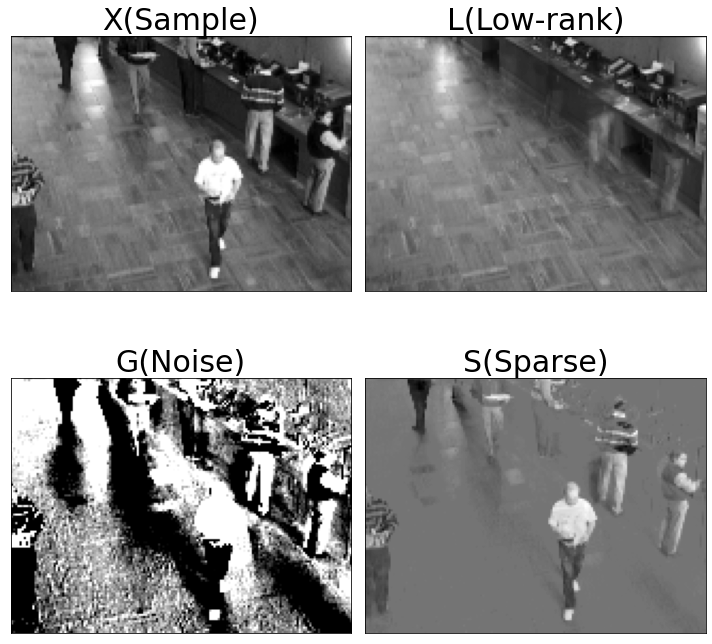

In [5]:
lowrank, sparse, reconstruction, noise, rmse = godec.greedy_semisoft_godec(
    data,
    rank=3,
    tau=7,
    iterated_power=5,
    rank_step_size=1,
    quiet=True,
)
fig, axes = make_figure(data, m, n, lowrank, sparse, reconstruction, noise)
fig.show()

# Compare outputs to results from original MATLAB version

![MATLAB Results](images/matlab_version_frame01.jpg)